### Importing Libraries

In [53]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, f1_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification
from tensorflow import keras
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

### Read and Split the Data

In [54]:
#Creating Dataset and including the first row by setting no header as input
dataset = pd.DataFrame()
dataset = pd.read_csv('celestial_train.csv')

# Retrieve for test data
output_data = pd.read_csv('celestial_test.csv')
output_data = output_data.iloc[:,1:]

X = dataset.iloc[:,1:17].values
y = dataset.iloc[:,17].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

### Balance and scale the dataset

In [55]:

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

output_transform = scaler.fit_transform(output_data)

# Use RandomUnderSampler to undersample the majority class
# Apply random under-sampling
sm = SMOTE(random_state = 2)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

### Train the Model

In [56]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(class_weight = {'GALAXY': 1, 'QSO': 10, 'STAR': 100 }, criterion = 'gini', n_estimators = 100, max_depth = 9, random_state=42, max_features = 2)
classifier.fit(X_train_balanced, y_train_balanced)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

print(balanced_accuracy_score(y_test, y_pred))

test_prediction = classifier.predict(output_transform)
print(test_prediction)
result = pd.DataFrame({'id': range(50000, 100000), 'output': test_prediction})
result.to_csv('celestial_submission.csv', index=False)

0.91640179470651
['QSO' 'GALAXY' 'QSO' ... 'QSO' 'QSO' 'QSO']


(array([22851., 22896.,  4253.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

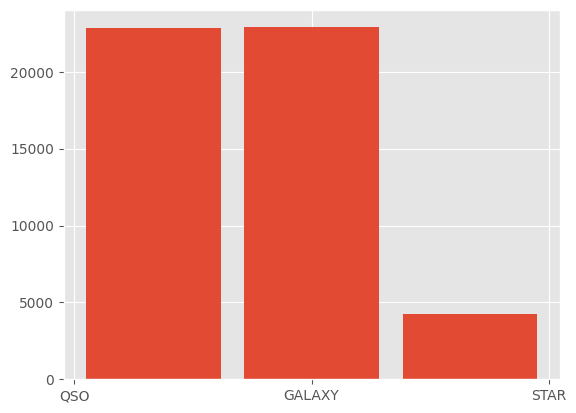

In [57]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(test_prediction,bins=3,rwidth=0.85)